Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Prashant Sanghal"
COLLABORATORS = "N/A"

# Presenting Uncertainty
## School of Information, University of Michigan

## Week 3: Assignment Overview
Version 1.1
### The objectives for this week are for you to:
- learn how to construct hypothetical outcome plots (HOPs) and spaghetti plots for a fit line
- practice making HOPs and spaghetti plots on Boston Housing Prices dataset

In [2]:
import time
import altair as alt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
from sklearn import linear_model
from sklearn import gaussian_process
import numpy as np

import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




# Part 1: Learn to plot HOPs and spaghetti plots for linear regression (12 points)

The following salary dataset describes the relationship between someone's salary and the number of years of experience someone has. In this section, we will construct an animated hypothetical outcome plot (HOP) and a spaghetti plot of a linear regression fit to this dataset.

In [3]:
#load dataset
salary_df = pd.read_csv("asset/Salary_Data.csv")
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 1.1 Construct the basic building blocks of a HOPs visualization

In order to construct a HOPs visualization, we need the following functions:

1. A function to construct an Altair chart of the data: `get_salary_points_chart()`
2. A function to get one bootstrap sample of the linear regression fit: `get_one_bootstrap_salary_fit()`
3. A function to construct an Altair chart of one linear regression fit line: `get_salary_linear_fit_chart()`

Then we will combine all these functions together to make an animation.

### Question 1.1.1 Plot the data (5 points)

Construct a function, `get_salary_points_chart()`, which plots the data in `salary_df` as a scatterplot. The output should look like this:

![A scatterplot of Years of Experience (x axis) against Salary (y axis)](asset/assignment3_salary_points_chart.png)

In [4]:
def get_salary_points_chart():
    '''
    This function should return an altair plot object that is a scatterplot of
    the salary data, with YearsExperience on the x axis and Salary on the y axis
    '''
    # YOUR CODE HERE
    return alt.Chart(salary_df).mark_circle(color = 'black').encode(
        x = alt.X('YearsExperience'), 
        y = alt.Y('Salary'))
    raise NotImplementedError()
    
get_salary_points_chart()

alt.Chart(...)

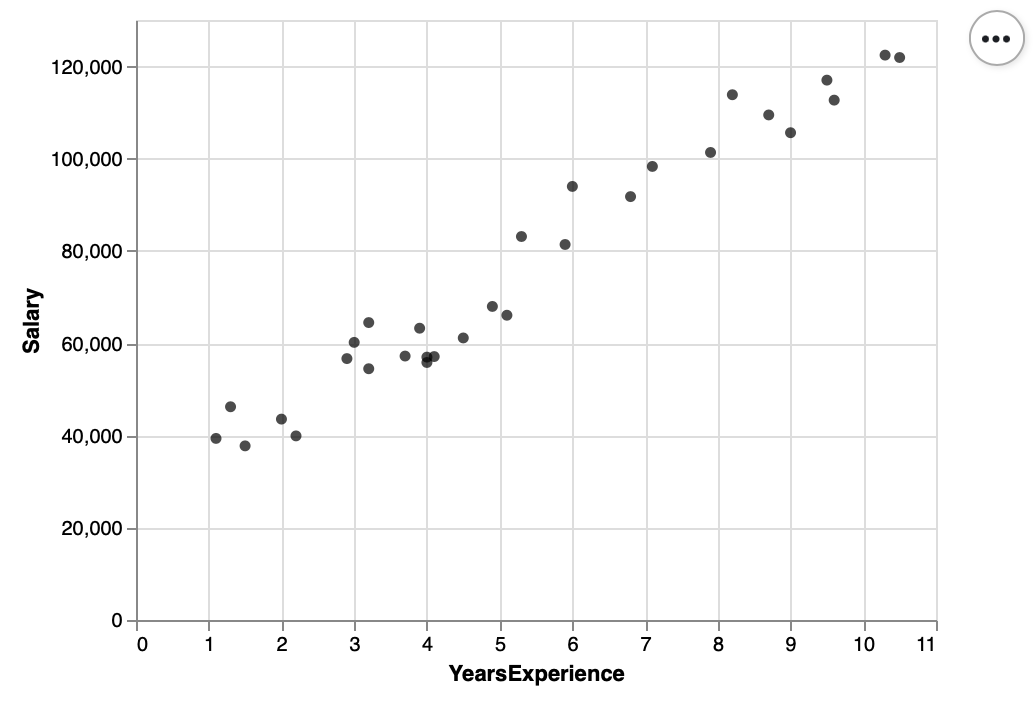

### Question 1.1.2 Bootstrap one linear regression fit (2 points)

We will need a function that returns one bootstrap sample of the regression fit. That is, it resamples the dataset with replacement, then fits a linear regression to the data. Fill in the code below to complete the function:

In [5]:
#Testing Code:

#View resmpled_df:
resampled_df = salary_df.sample(frac=1.0, replace=True)
resampled_df.head()

,YearsExperience,Salary
26,9.5,116969.0
3,2.0,43525.0
28,10.3,122391.0
17,5.3,83088.0
13,4.1,57081.0


In [6]:
def get_one_bootstrap_salary_fit():
    '''
    Returns a sklearn.linear_model.LinearRegression model representing 
    a fit to a bootstrap-resampled version of salary_df
    '''
    
    #resample the data with replacement (replace=True) to a data frame with 
    #the same number of data points (frac=1.0)
    resampled_df = salary_df.sample(frac=1.0, replace=True)

    #fit model to resampled data
    X = resampled_df[['YearsExperience']] #[[ ]] subsets so X remains a DataFrame
    y = resampled_df['Salary']            #y should be an array, so we use [ ]
    
    # insert code below using LinearRegression to return a linear regression model
    # with predictor X and outcome variable y
    # YOUR CODE HERE
    return LinearRegression().fit(X,y)
    raise NotImplementedError()

In [7]:
np.random.seed(1234)
fit = get_one_bootstrap_salary_fit()
assert np.abs(fit.coef_[0] - 10004) < 0.5, "Bootstrap linear regression: slope coefficient does not match the expected value"
assert np.abs(fit.intercept_ - 21485) < 0.5, "Bootstrap linear regression: intercept does not match the expected value"

We can use this function to get a single sample from the bootstrap sampling distribution of the fit (e.g., its slope and intercept). Each time you run the following cell you should get slightly different values:

In [8]:
salary_reg = get_one_bootstrap_salary_fit()
print("Bootstrapped intercept: ", salary_reg.intercept_)
print("Bootstrapped slope:     ", salary_reg.coef_[0])

Bootstrapped intercept:  23608.86257018456
Bootstrapped slope:      9759.092501075673


### Question 1.1.3 Construct an Altair chart of one regression fit (5 points)

To construct a chart of a fit line or fit curve, we first need a *prediction grid*: a set of x values we want to use to make predictions. This should be in the same form as the input to the regression function (i.e., a DataFrame). 

For this example, we will use evenly-spaced values of `"YearsExperience"`, the x value in our charts. Because it is a linear fit, we strictly speaking only need 2 values, but we will use more (101) because it generalizes better. When you plot non-linear relationships (as we will in Part 2), you need a large number of points in your prediction grid so that the curve is smooth.

In [9]:
# construct a prediction grid for the salary dataset with 101 
# evenly-spaced values from the minimum to maximum number of years of experience
salary_pred_grid = pd.DataFrame({'YearsExperience': np.linspace(
    salary_df['YearsExperience'].min(), 
    salary_df['YearsExperience'].max(), 
    num=101
)})

Complete the `get_salary_linear_fit_chart()` so that it displays a single fit line from the linear regression fit passed in to it. The chart should look like this:

![A line chart of Years of Experience (x axis) against Salary (y axis)](asset/assignment3_salary_line_chart.png)

In [10]:
#View grid:
salary_pred_grid.head()

,YearsExperience
0,1.100
1,1.194
2,1.288
3,1.382
4,1.476


In [11]:
def get_salary_linear_fit_chart(salary_reg, opacity=0.5):
    '''
    Takes a single linear regression fit (as returned by `get_one_bootstrap_salary_fit()`) and
    returns an Altair chart plotting the fit line
    
    Parameters:
    
    - salary_reg: A regression fit
    - opacity: The opacity of the output line
    '''
    #use the model to predict the mean Salary at each x position
    pred_df = pd.DataFrame({
        'YearsExperience': salary_pred_grid['YearsExperience'],
        'Salary': salary_reg.predict(salary_pred_grid)
    })

    #insert code to return an Altair chart showing the fit line using `pred_df`
    #remember to set the opacity of the line mark to the `opacity` value
    #passed into this function (e.g. `mark_line(opacity=opacity)`)
    # YOUR CODE HERE
    return alt.Chart(pred_df).mark_line(
        color = 'red', 
        opacity= opacity).encode(
        x = alt.X('YearsExperience'),
        y = alt.Y('Salary'))
    raise NotImplementedError()

get_salary_linear_fit_chart(salary_reg)

alt.Chart(...)

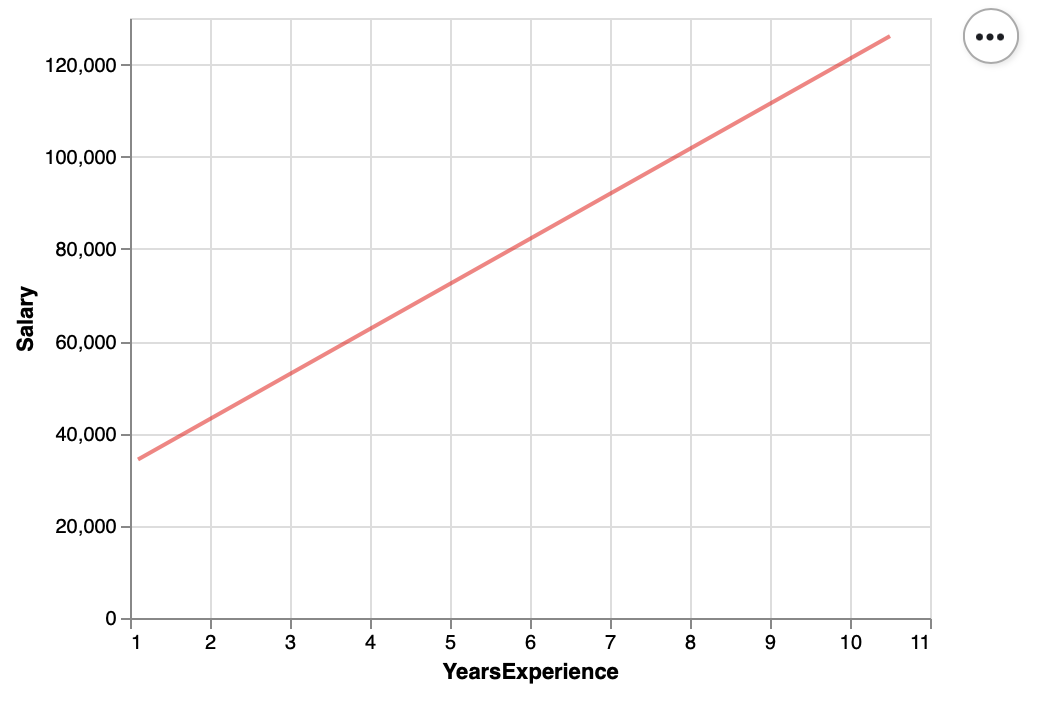

## 1.2 Construct HOPs of the salary data

Now that you have all the pieces, you should be able to put them together to construct a HOPs visualization.

First, run the following code chunk a few times: you should notice that the fit line moves each time you run it.

In [12]:
points_chart = get_salary_points_chart()
salary_reg = get_one_bootstrap_salary_fit()
line_chart = get_salary_linear_fit_chart(salary_reg)
line_chart + points_chart

alt.LayerChart(...)

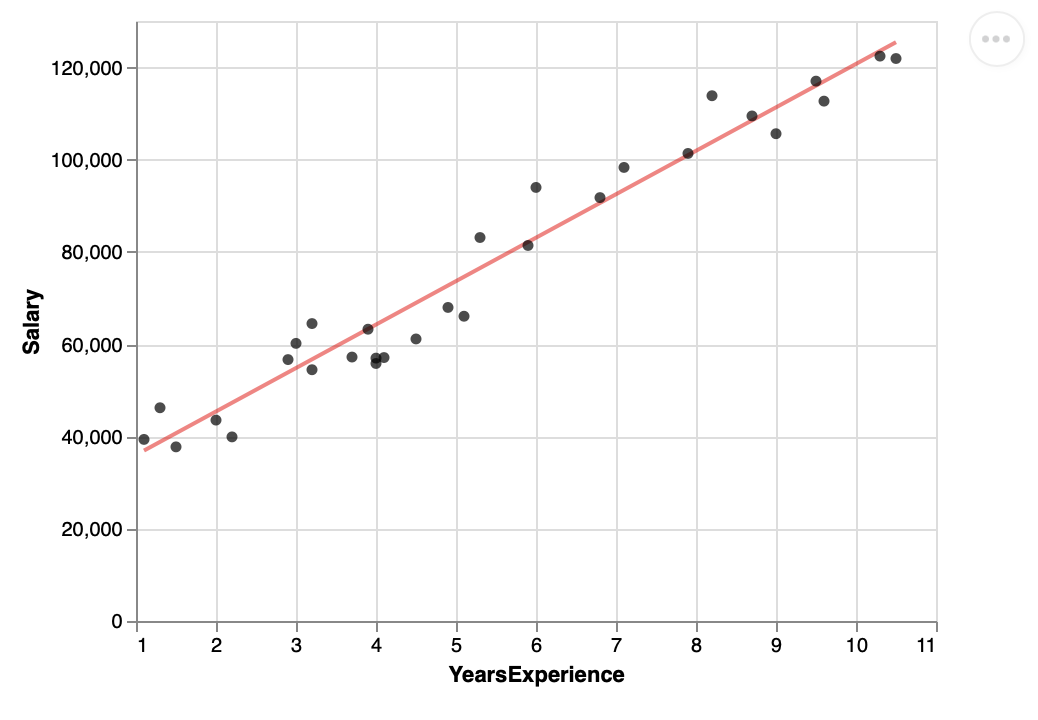

We will use the `interact()` function to run the above code to generate each frame needed in our HOPs. Run the following code, then press the Play button to start the animation:

In [13]:
def get_one_frame(i):
    '''
    Return one frame in the animation
    '''

    time.sleep(.2)

    # get the point chart
    points_chart = get_salary_points_chart()
    
    # fit one bootstrap regression
    salary_reg = get_one_bootstrap_salary_fit()
    
    # get the line chart
    line_chart = get_salary_linear_fit_chart(salary_reg)
    
    #return the combined points + lines chart
    return line_chart + points_chart

interact(get_one_frame, i = widgets.Play(
    value=0,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False))

interactive(children=(Play(value=0, description='Press play'), Output()), _dom_classes=('widget-interact',))

<function __main__.get_one_frame(i)>

## 1.3 Construct a spaghetti plot of the salary data

The same functions we used to make the HOPs chart above can be used to make a spaghetti plot as well. This time, we will combine all the line charts together instead of playing them frame-by-frame. First, we make a list containing all the line charts (in the `line_charts` variable), then we use `alt.layer()` to layer all of the line charts together. Finally, we add on the chart of the points:

In [14]:
B = 50

# get `B` bootstrapped fit line charts
# Note opacity=0.1 sets the line opacity so it is easier to see the overlapping lines. Make
# sure your get_salary_linear_fit_chart() function (defined above) properly uses the opacity argument!
line_charts = [get_salary_linear_fit_chart(get_one_bootstrap_salary_fit(), opacity=0.1) for _ in range(B)]

#combine all the line charts together and layer on the points chart
alt.layer(*line_charts) + get_salary_points_chart()

alt.LayerChart(...)

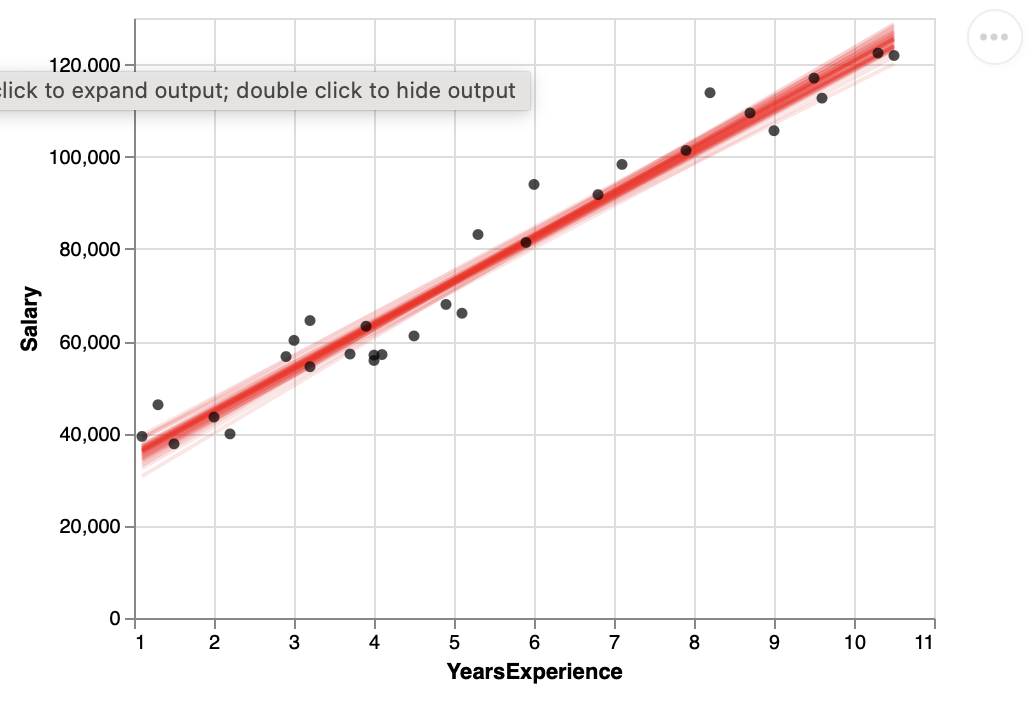

# Part 2: Spaghetti plots for Polynomial Regression (5 points)

To demonstrate the difference in how you must modify your code to fit a new model, in this section we show how to create spaghetti plots for a polynomial regression. We will follow the same steps as before:

1. A function to construct an Altair chart of the data: `get_poly_points_chart()`
2. A function to get one bootstrap sample of the linear regression fit: `get_one_bootstrap_poly_fit()`
3. A function to construct an Altair chart of one linear regression fit line: `get_poly_fit_chart()`

We will generate a dataset with two variables (`x` and `y`), then draw spaghetti plots of a polynomial fit to the dataset.

## 2.1 Generate dataset

First, generate the dataset:

In [15]:
#prepare dataset
np.random.seed(42)
n = 25

original_x = 5 - 4 * np.random.normal(0, 1, n)
original_y = -2 + 3*original_x - 5*(original_x ** 2) + 7*(original_x ** 3) + np.random.normal(0, 1000, n)

poly_df = pd.DataFrame({'x': original_x, 'y': original_y})

In [16]:
#View Data: 
print(poly_df.shape)
poly_df.head()

(25, 2)


,x,y
0,3.013143,264.061854
1,5.553057,-91.860852
2,2.409246,449.794120
3,-1.092119,-620.996858
4,5.936613,1012.483463


## 2.2 Define helper functions

We'll define the polynomial points chart and draw it:

In [17]:
def get_poly_points_chart():
    '''
    This function should return an altair plot object that is a scatterplot of
    the salary data, with YearsExperience on the x axis and Salary on the y axis
    '''
    return alt.Chart(poly_df).mark_circle(color="black").encode(
        x='x',
        y='y'
    )

get_poly_points_chart()

alt.Chart(...)

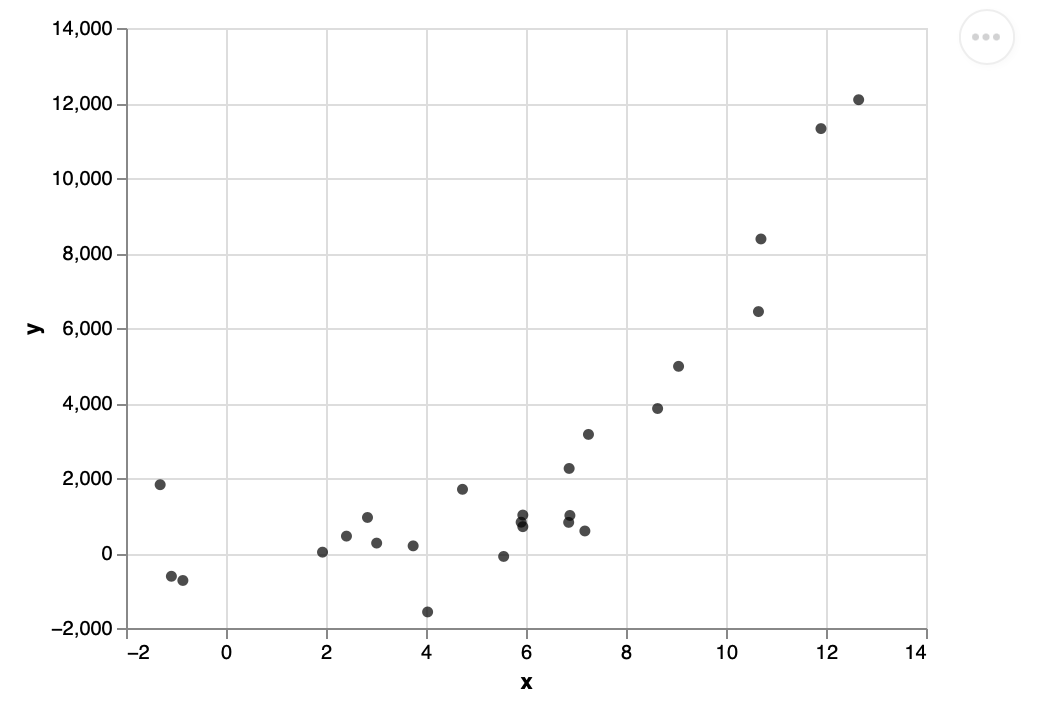

Then we define the `get_one_bootstrap_poly_fit()` and `get_poly_fit_chart()` functions so we can draw a single fit:

In [18]:
#prediction grid
poly_pred_grid = pd.DataFrame({
    "x": np.linspace(poly_df['x'].min(), poly_df['x'].max(), num=101)
})

def get_one_bootstrap_poly_fit():
    '''Get one bootstrap sampled polynomial regression fit to the data'''
    #resample the data with replacement (replace=True) to a data frame with 
    #the same number of data points (frac=1.0)
    resampled_df = poly_df.sample(frac=1.0, replace=True)

    #fit model to resampled data
    X = resampled_df[['x']] #[[ ]] subsets so X remains a DataFrame
    y = resampled_df['y']   #y should be an array, so we use [ ]
    
    #x must be transformed into polynomials (e.g. x, x^2, x^3 ... up to the value of `degree`)
    polynomial_features = PolynomialFeatures(degree=2)
    X_poly = polynomial_features.fit_transform(X)
    poly_reg = linear_model.LinearRegression()
    poly_reg.fit(X_poly, y)
    
    return poly_reg

def get_poly_fit_chart(poly_reg, opacity=0.5):
    '''
    Takes a single polynomial regression fit (as returned by `get_one_bootstrap_poly_fit()`) and
    returns an Altair chart plotting the fit curve
    
    Parameters:
    
    - poly_reg: A regression fit
    - opacity: The opacity of the output line
    '''
    #use the model to predict y at each x position
    polynomial_features = PolynomialFeatures(degree=2)
    pred_df = pd.DataFrame({
        'x': poly_pred_grid['x'],
        'y': poly_reg.predict(polynomial_features.fit_transform(poly_pred_grid))
    })

    #return an Altair chart showing the fit line
    return alt.Chart(pred_df).mark_line(
        opacity=opacity,
        color='red'
    ).encode(
        x='x',
        y='y'
    )

poly_reg = get_one_bootstrap_poly_fit()
get_poly_fit_chart(poly_reg)

alt.Chart(...)

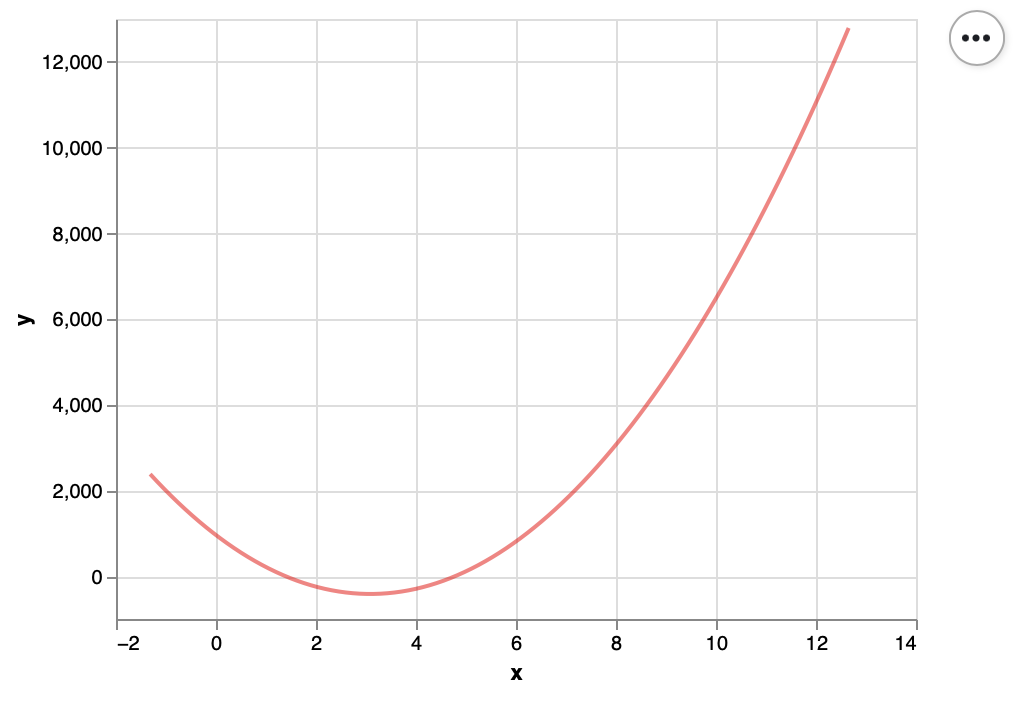

In [19]:
#View Poly pred grid: 
poly_pred_grid.head()  #this is the x-axis 

,x
0,-1.316851
1,-1.177152
2,-1.037452
3,-0.897752
4,-0.758052


# 2.3 Draw spaghetti plot for polynomial regression

### Question 2.3.1 Draw a spaghetti plot for the above polynomial regression (5 points)

Using the helper functions defined above (`get_poly_points_chart()`, `get_one_bootstrap_poly_fit()`, and `get_poly_fit_chart()`), draw a spaghetti plot for the example polynomial regression data. Your output should look something like this:

![Polynomial spaghetti plot fit](asset/assignment3_poly.png)

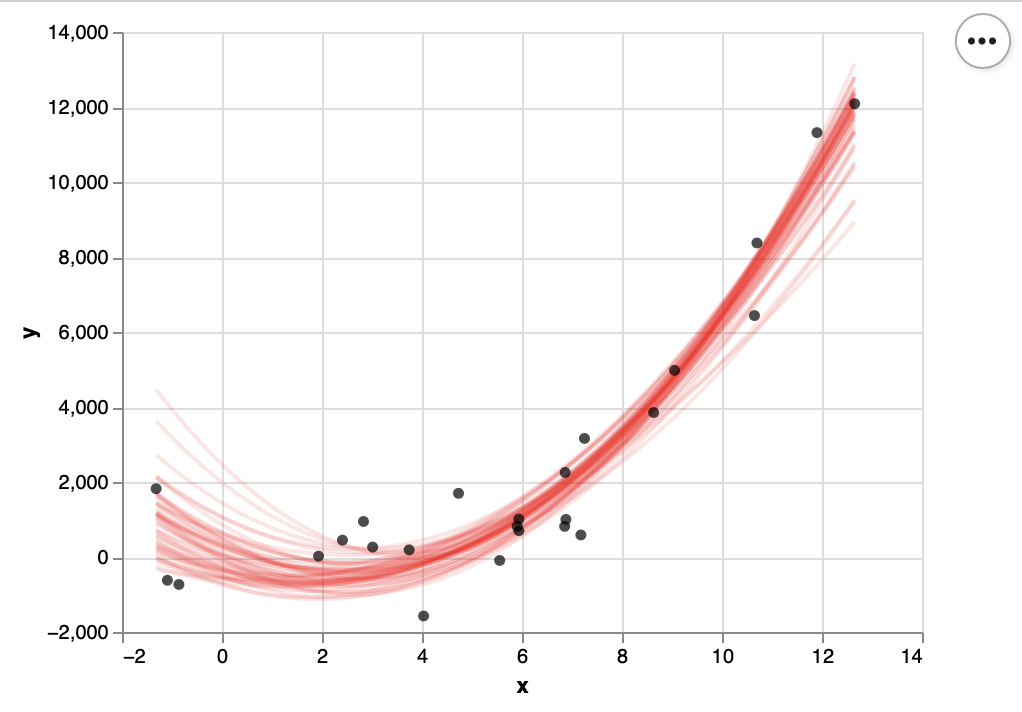

In [20]:
# YOUR CODE HERE
#Say we want to fit 50 lines: 
BS = 50
poly_charts = [get_poly_fit_chart(get_one_bootstrap_poly_fit(), opacity = 0.1) for _ in range(BS)] 

alt.layer(*poly_charts) + get_poly_points_chart()


#raise NotImplementedError()

alt.LayerChart(...)

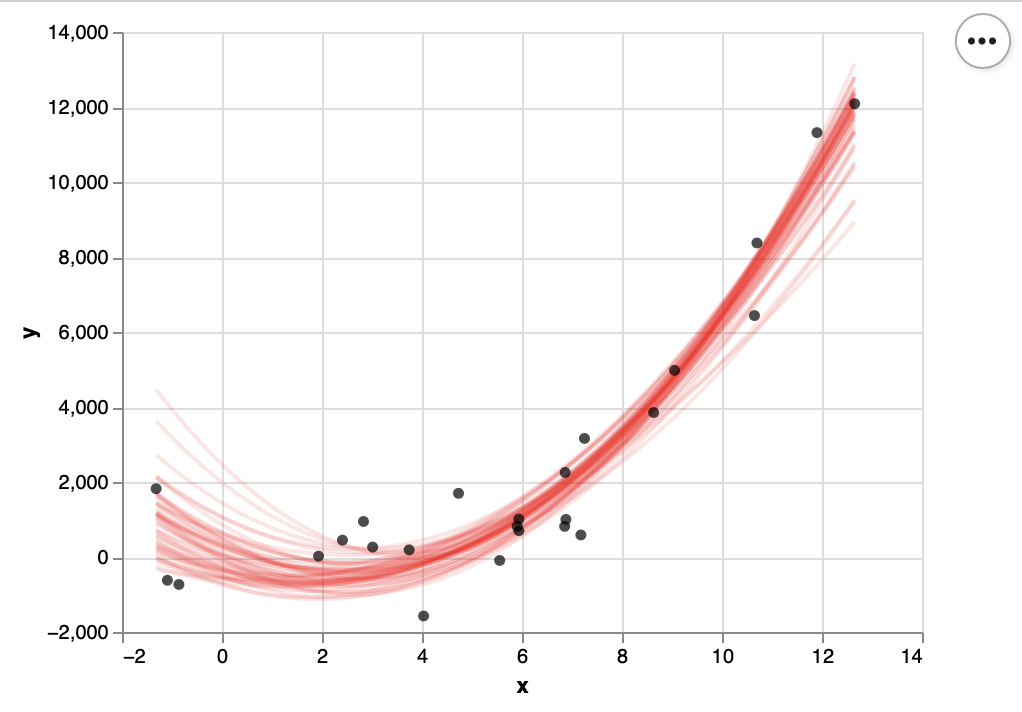

# Part 3: Boston housing price dataset (23 points)

Apply what you have learned above to construct hypothetical outcome plots and spaghetti plots for the relationship between housing prices and the `LSTAT` variable (average of the proportion of adults without some high school education and the proportion of male workers classified as laborers). It can be seen from the below figure that LSTAT has a slight non-linear variation with the target variable:

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()

#create a dataframe containing predictors (housing_X) and the response variable (housing_y)
housing_X = pd.DataFrame(boston.data, columns = boston.feature_names)[['LSTAT']]
housing_y = pd.Series(boston.target, name = "price")

#also create a combined data frame with both predictors and response variables
housing_df = pd.concat([housing_y, housing_X], axis=1)

# show the LSTAT versus price
alt.Chart(housing_df).mark_point().encode(
    x="LSTAT",
    y="price"
)

alt.Chart(...)

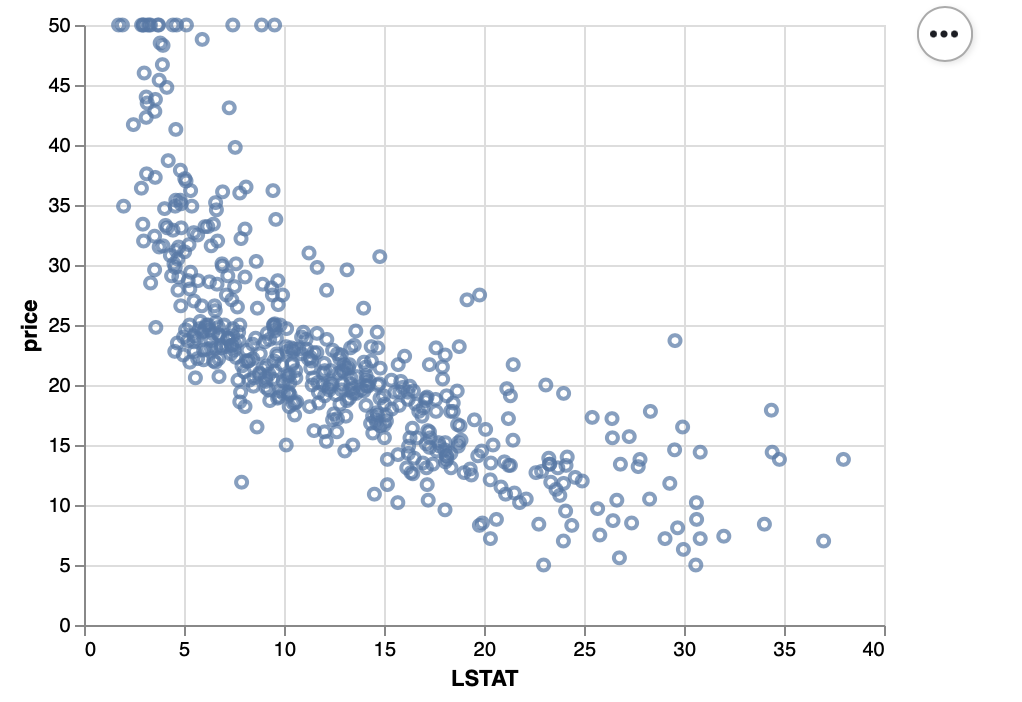

## 3.1 HOPs and spaghetti plots

Use HOPs and spaghetti plots to visualize a regression model predicting `price` using `LSTAT`. You can use any model type you like, including linear regression, polynomial regression, or any other regression model type.

### Question 3.1.1 Define helper functions (10 points)

Define the helper functions you will need, including:

1. A function to construct an Altair chart of the data: `get_housing_points_chart()`
2. A function to get one bootstrap sample of the fit: `get_one_bootstrap_housing_fit()`
3. A function to construct an Altair chart of one regression fit curve: `get_housing_fit_chart()`


In [22]:
resampled_one = housing_df.sample(frac=1.0, replace = True)
resampled_one.head()

,price,LSTAT
146,15.6,16.65
111,22.8,10.16
380,10.4,17.21
402,12.1,20.31
35,18.9,9.68


#### Point Chart Function:

In [23]:
# define your helper functions below. Hint: this is also a good place to define a prediction grid

# YOUR CODE HERE

def get_housing_points_chart():
    
    """A function to construct an Altair Chart of Data"""
    
    return  alt.Chart(housing_df).mark_point(color = 'grey').encode(
    x="LSTAT",
    y="price")  

    raise NotImplementedError()
get_housing_points_chart()

alt.Chart(...)

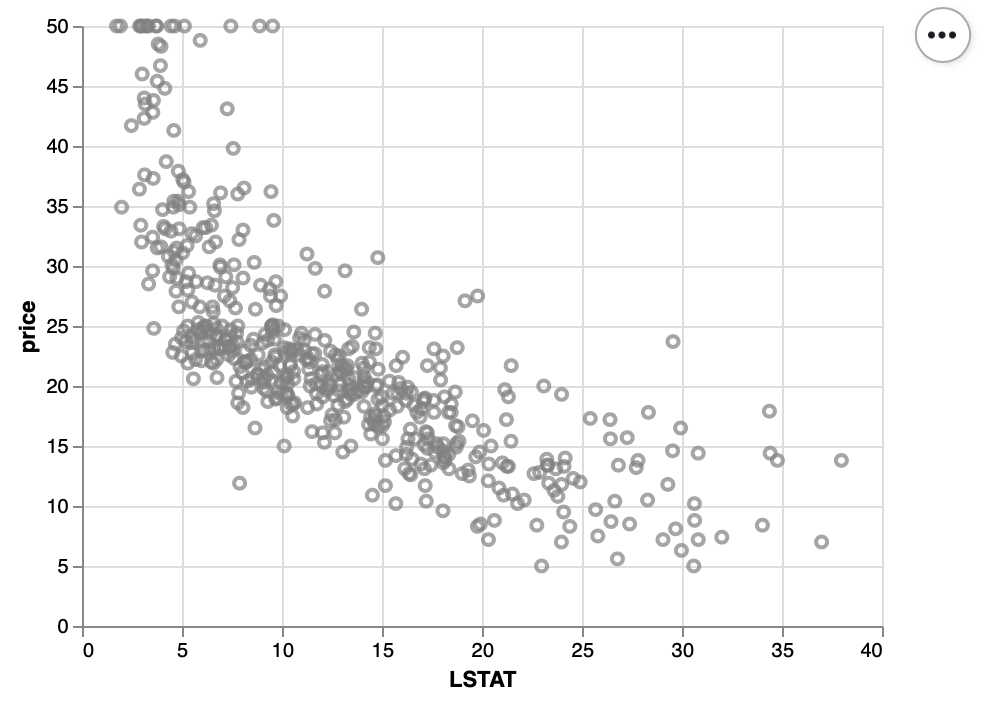

#### Single bootstrap fit line:

In [24]:
def get_one_bootstrap_housing_fit():
    
    """A function to get one bootstrap sample of the fit"""
    
    #Create single bootstrap fit sample:
    resampled_one = housing_df.sample(frac=1.0, replace = True)
    
    #X:
    X_lstat = resampled_one[['LSTAT']]
    
    #y: 
    y_price = resampled_one['price']
    
    #Fit model:
    return LinearRegression().fit(X_lstat, y_price)
    raise NotImplementedError()
get_one_bootstrap_housing_fit()

#So this function fits a single line. We need more fit lines to make a spaghetti plot

LinearRegression()

In [25]:
#Result: 
price_reg = get_one_bootstrap_housing_fit()
print('Coefficient:',price_reg.coef_, '\nIntercept:', price_reg.intercept_)

Coefficient: [-0.90071029] 
Intercept: 33.748763818452204


#### Build single line housing fit chart: 

In [26]:
#To do this I need equally spaced LSTAT on the x-axis 
#I also need predicted values of LSTAT on the y-axis 
#In order to plot the linear regression fit line. 
#But this is going to be a single fit linear regression line.
# We will then bootstrap this over 50 lines to generate spagethi plot of this model.
#So, let's get strated!

In [27]:
#Define function to get housing fit chart: 

def get_housing_fit_chart(price_reg, opacity = 0.5):
    
    """A function to construct an Altair chart of one regression fit curve"""

    #Equally spaced LSTAT grid on the x-axis: 
    lstat_grid = pd.DataFrame({'LSTAT':np.linspace(resampled_one['LSTAT'].min(), resampled_one['LSTAT'].max(), num = 101)})

    #Predicted values of LSTAT on the y-axis: 
    pred_price = price_reg.predict(lstat_grid)

    #Datafarme of Predicted values of LSTAT: 
    pred_df = pd.DataFrame({'LSTAT':lstat_grid['LSTAT'], 'price':pred_price})

    #Build Chart: 
    return alt.Chart(pred_df).mark_line(
        color = 'red', 
        opacity = opacity).encode(
        x = alt.X('LSTAT'),
        y = alt.Y('price'))

#Result: 
get_housing_fit_chart(price_reg)
#So this is the single fit line
#We can also add the point chart here to see how closely the single fit line passed through the points. 
#Meaning, look at the residuals. 
#Whihc we ill do it later, while constructing the Hypothetical Outcome Plot (HOP's)

alt.Chart(...)

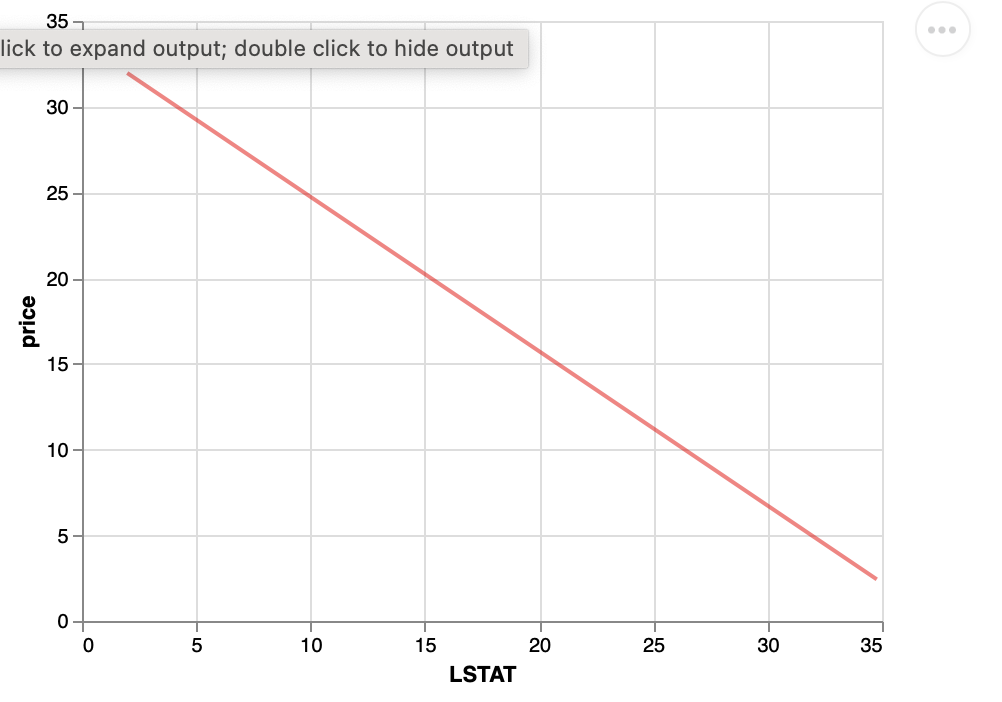

### Question 3.1.2 Create a spaghetti plot for your model (5 points)

Using the helper functions you created above, visualize a spaghetti plot of your model below.


In [28]:
# YOUR CODE HERE
#Creating 50 bootstrap samples of single fit as per above:
bootstrap = 50 

#Get a list of fit lines using two function above: 
bootstrap_fit = [get_housing_fit_chart(get_one_bootstrap_housing_fit(), opacity = 0.1) for _ in range(bootstrap)]

#Plot spaghetti chart: 
alt.layer(*bootstrap_fit) + get_housing_points_chart()

#raise NotImplementedError()

alt.LayerChart(...)

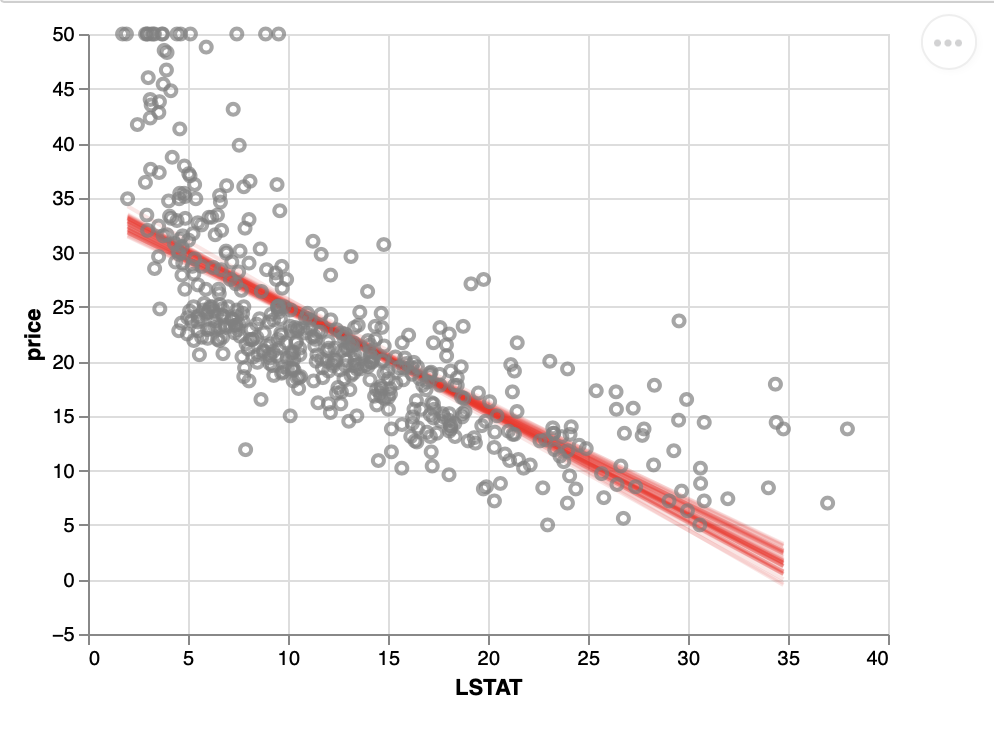

### Question 3.1.3 Create a HOPs chart for your model (5 points)

Using the helper functions you created above, visualize a HOPs chart of your model below.

In [29]:
#HOP Chart: 
#To do this, we will first fit the single line plot on the point chart: 
price_reg = get_one_bootstrap_housing_fit()
line_chart = get_housing_fit_chart(price_reg)
point_chart = get_housing_points_chart()

line_chart+point_chart

#OK, so here is our single fit line passing through the scatter plot.
#Now, in order to demonstrate the uncertaintly in our price prediction
#We will construct a HOP plot using interact function. 

alt.LayerChart(...)

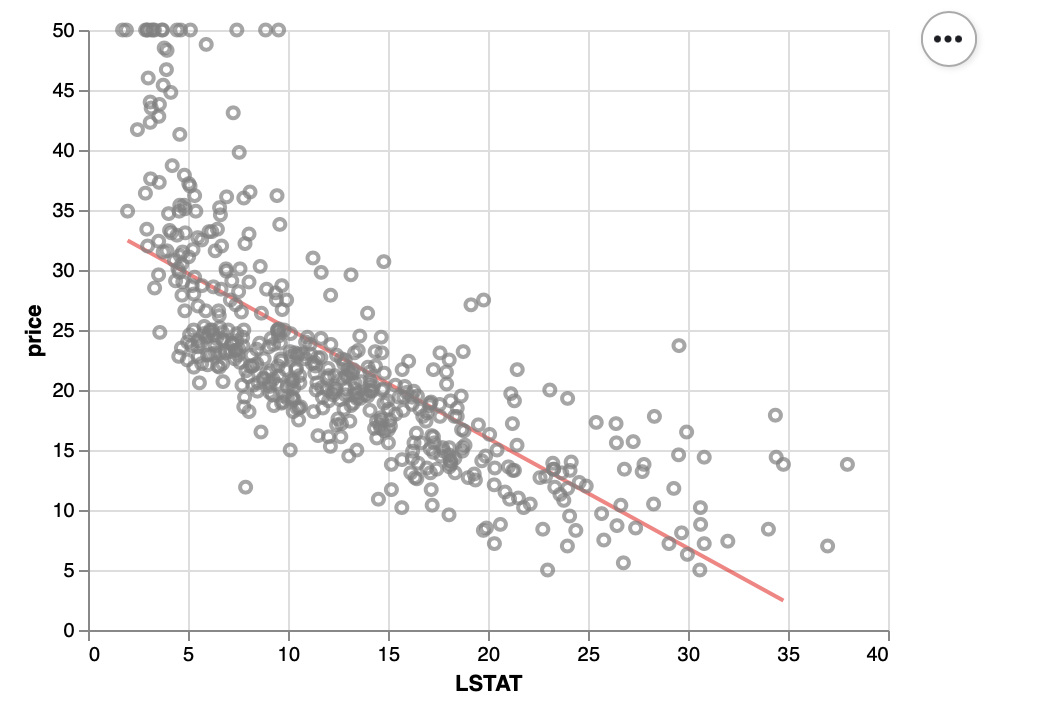

In [30]:
# YOUR CODE HERE
def get_one_frame(i):
    '''
    Return one frame in the animation
    '''

    time.sleep(.2)

    # get the point chart
    point_chart = get_housing_points_chart()
    
    # fit one bootstrap regression
    price_reg = get_one_bootstrap_housing_fit()
    
    # get the line chart
    line_chart = get_housing_fit_chart(price_reg)
    
    #return the combined points + lines chart
    return line_chart + point_chart

interact(get_one_frame, i = widgets.Play(
    value=0,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False))
   # raise NotImplementedError()

interactive(children=(Play(value=0, description='Press play'), Output()), _dom_classes=('widget-interact',))

<function __main__.get_one_frame(i)>

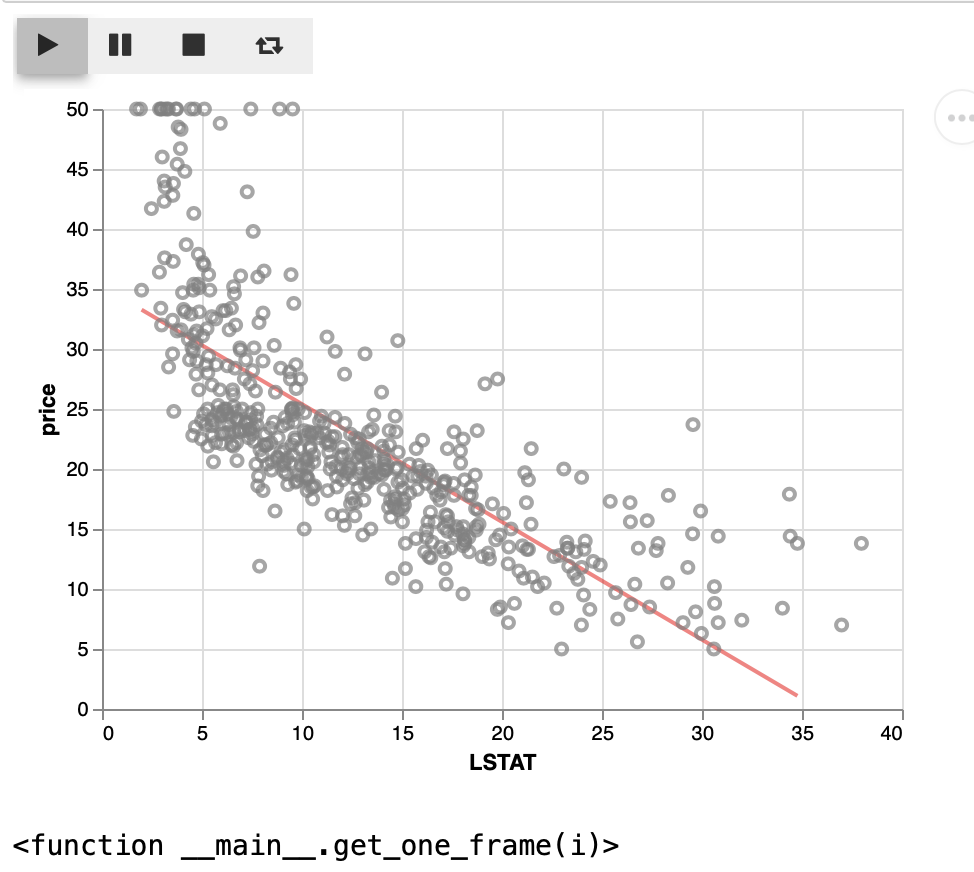

### Question 3.1.4 Reflect on your model (3 points)

Given the visualizations above, reflect on the model you chose and your uncertainty in the relationship between `LSTAT` and `price` in these data. Discuss both small world and large world uncertainty. This discussion should be one to two paragraphs at most.

YOUR ANSWER HERE

In the above plot, we used linear regression line to predict housing price using LSTAT. First, we used single bootstrap sample to fit a line through the scatter plot between LSTAT and price, and then we used a spaghetti plot to fit a bootstrap samples of 50 lines in the same chart. By comparing both plots, we were able to derive three things (1) uncertainty in the model prediction (2) negative correlation between LSTAT and housing price, and (3) noisy data resulting in slight non-linearity. The main question which came to my mind was, can we use this model to build our pricing prediction. If yes then, how to interpret this uncertainty for our model users to aid better decision making?  

Let's try and understand this further by using linear regression equation: y = mx+c where m is the slope, c is the intercept, x is the 'LSTAT' and y is the 'price' we are trying to predict. By fitting a single regression line, we noticed that with every 1 unit increase in LSTAT, the housing price decreased by 0.97543692 on an average. However, as we simulated more slope-intercept pairs using bootstrap samples, the strength of relationship between LSTAT and price also varied. I found spaghetti and HOP's plot more effective in representing small world and large world uncertainty respectively than trying to interpret it using CDF's and confidence intervals. I learned that by grouping variations in model predictions utilizing static or animated visuals, we were helping our readers avoid uncertainty interpretation errors, understand how uncertainty in model prediction could impact their business as well as see how correlation between target and predictor variables could vary using simulation, which I found it to be very powerful.


Please remember to submit both the .pdf and .ipynb formats of your completed notebook. When generating your pdf, be sure to run your complete code first and then print the page to pdf (rather than download the page as a pdf).
Please remember to work on your explanations and interpretations!